In [6]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [7]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [8]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.DNK.value(shrinkage_type="qis", window_size=365 * 20)

In [9]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=0,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [10]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:12<00:00, 22.06it/s]


StrategyStatistics:
* final_nav = 10.283207
* geom_avg_total_r = 0.130405
* geom_avg_xs_r = 0.122626
* std_xs_r = 0.146926
* min_xs_r = -0.074626
* max_xs_r = 0.102659
* skew = 0.208088
* kurtosis = 12.497363
* max_dd = -0.260869
* sharpe = 0.834612
* alpha_buy_hold = 0.052833
* tracking_error_buy_hold = 0.162950
* ir_buy_hold = 0.324231
* factor_loadings = {'low_risk': 0.5793645019985101, 'momentum': -0.10963616764052123, 'quality': 0.11413731957707755, 'size': 0.0317369517696855, 'value': -0.2205576294243632, 'spx': 0.6750950815540386}
* alpha_benchmark = 0.058713
* alpha_benchmark_pvalue = 0.010083
* tracking_error_benchmark = 0.098140
* ir_benchmark = 0.598257
* ttest_pval = 0.276458
* levene_pval = 0.000000
* timing_ability_coef = -0.022905
* timing_ability_pval = 0.198766

In [11]:
result.std_xs_r, result.sharpe

(0.14692592498059964, 0.834612266201602)

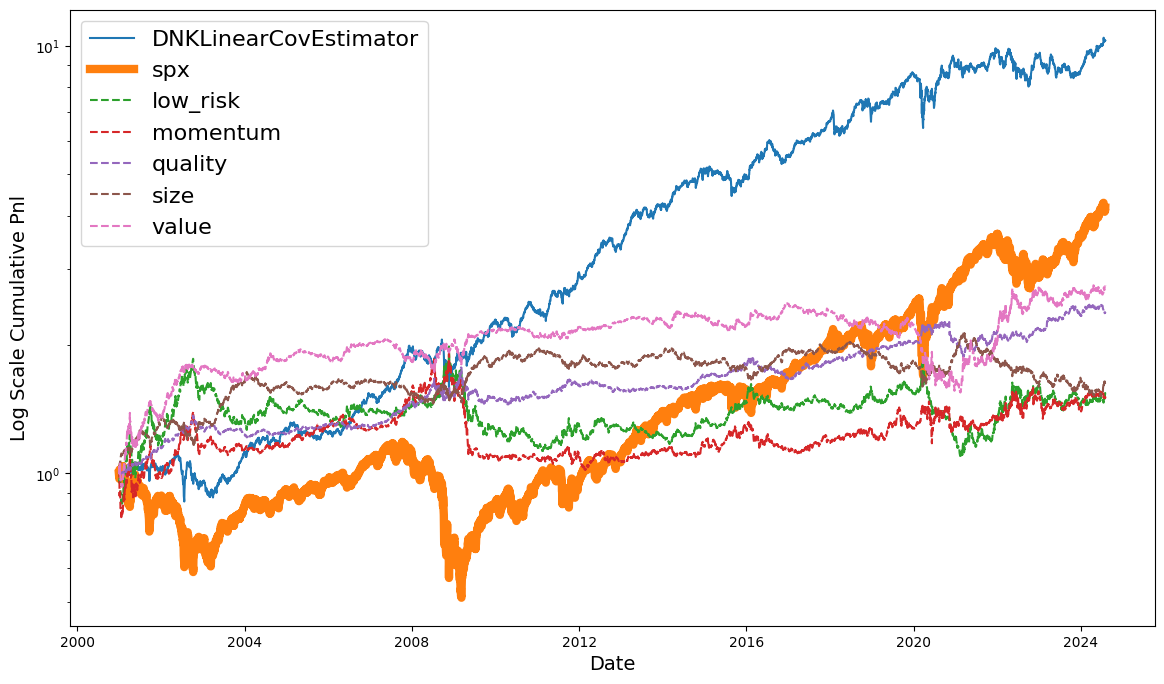

In [12]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

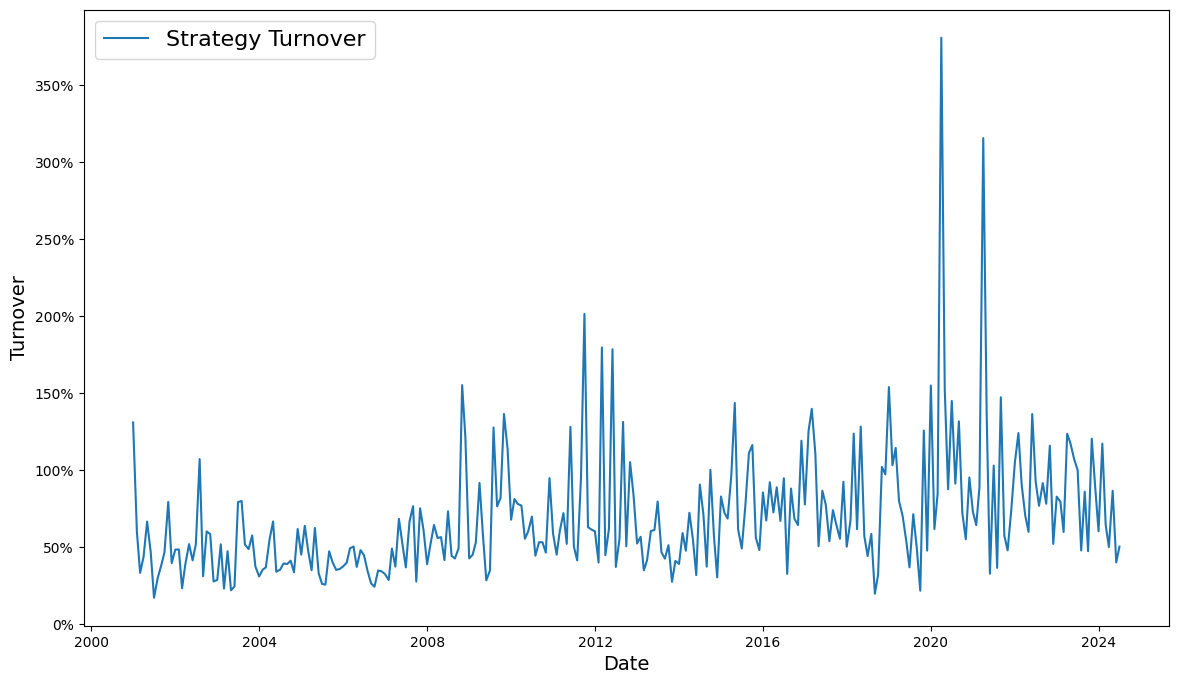

In [13]:
runner.plot_turnover()

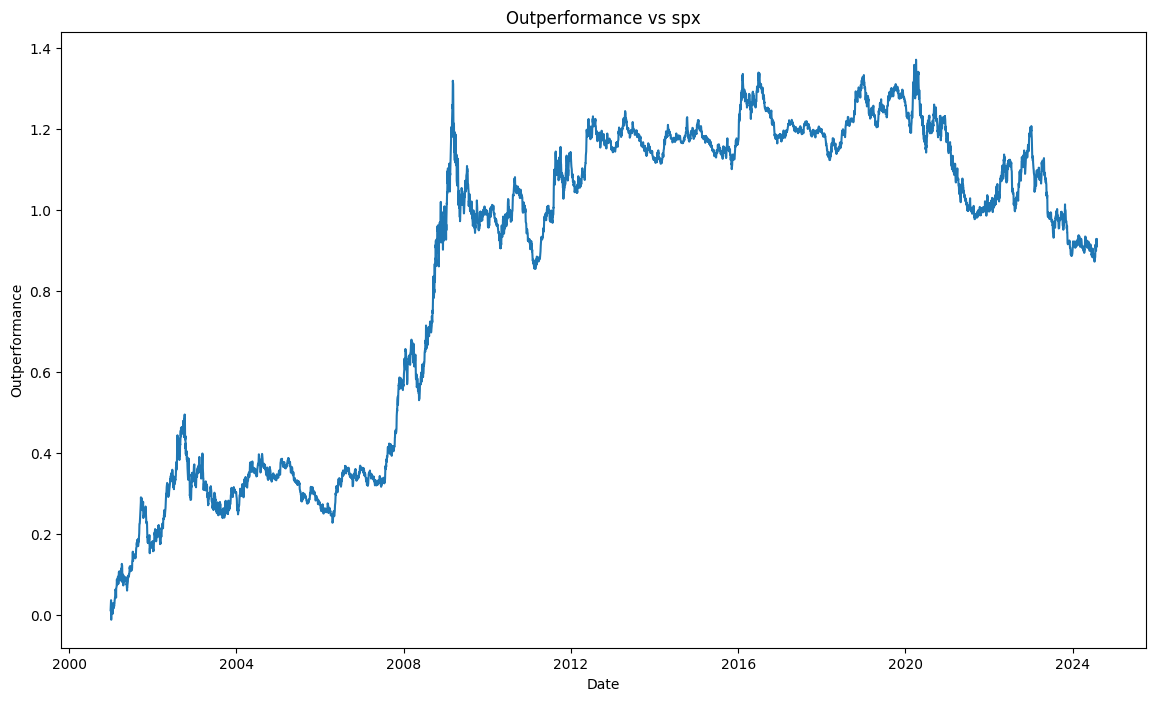

In [14]:
runner.plot_outperformance(mkt_only=True)

In [15]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")